# Data Sampling

## Import Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from random import sample

## Read Data

In [20]:
df_books_final = pd.read_csv('df_books_final.csv')


In [22]:
df_books_final.head(3)

,book_id,average_rating,ratings_count,text_reviews_count,top_popular_shelves,author_ids,title_tfidf,description_word2vec,format_Audio,format_Digital,...,lang_tr,lang_tur,lang_ukr,lang_vi,lang_vie,lang_yid,lang_zh,length_long,length_medium,length_short
0,287141,0.670613,-0.046597,-0.094240,"[{'count': '4', 'name': 'history'}, {'count': ...",['3041852'],"(0, 10604)\t0.42579859675890475\n (0, 3492)...",[ 6.95598602e-01 4.52605486e-01 5.65332353e-...,False,False,...,False,False,False,False,False,False,False,False,True,False
1,6066812,0.921068,-0.042117,-0.098249,"[{'count': '9', 'name': 'favorites'}, {'count'...",['19158'],"(0, 16191)\t0.3157176733108245\n (0, 30033)...",[ 0.9027284 0.82348305 0.47872484 0.423247...,False,False,...,False,False,False,False,False,False,False,False,True,False
2,89378,1.505462,0.064108,0.651555,"[{'count': '8', 'name': 'pets'}, {'count': '8'...",['5411'],"(0, 11832)\t0.8332686465030811\n (0, 7249)\...",[ 1.0797411e+00 5.8800226e-01 3.7105912e-01 ...,False,False,...,False,False,False,False,False,False,False,False,False,True


In [23]:
df_interactions_final_merged = pd.read_csv('df_interactions_final_merged.csv')

In [24]:
print(df_interactions_final_merged.shape)
df_interactions_final_merged.head(3)

(6626989, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,2015-11-17 19:37:35+00:00,7.0,3248,fun sequel original,0.680800
1,8842281e1d1347389f2ab93d60773d4d,18296097,bc9cff98f54be3b2b8c5b34598a7546c,5,NaN,2015-09-21 15:16:57+00:00,NaN,3305,NaN,0.574139
2,8842281e1d1347389f2ab93d60773d4d,817720,75fd46041466ceb406b7fd69b089b9c5,5,NaN,2015-05-21 04:29:23+00:00,NaN,3429,NaN,0.574139


## Remove books not in df_books_final

In [25]:
df_books_final['book_id']

0          287141
1         6066812
2           89378
3         1698376
4         3631900
           ...   
85461     2695124
85462    32874102
85463    30739434
85464      137956
85465     1401006
Name: book_id, Length: 85466, dtype: int64

In [26]:
filtered_df = df_interactions_final_merged[df_interactions_final_merged['book_id'].isin(df_books_final['book_id'])]

In [27]:
filtered_df.shape

(5134881, 10)

## Remove interactions without review texts

In [28]:
filtered_df = filtered_df[filtered_df['review_text_incomplete'].notna()]

In [29]:
filtered_df.shape

(554955, 10)

## Sampling Data from Interactions

In [30]:
# Group by user to plot number of reviews per user
user_review_counts = filtered_df.groupby('user_id').size().reset_index(name='review_count')
user_review_counts_sorted = user_review_counts.sort_values(by='review_count', ascending=False)
print(user_review_counts_sorted['review_count'].describe())

count    75518.000000
mean         7.348645
std         47.428214
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max       4131.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

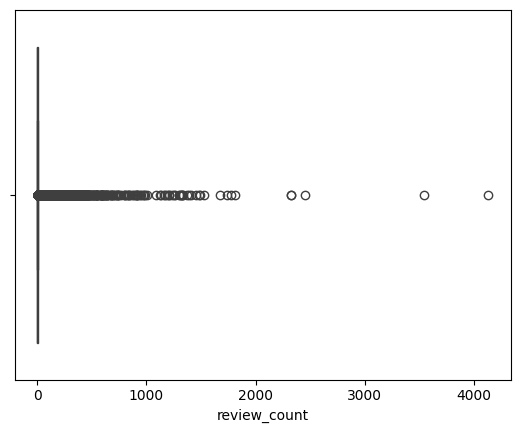

In [31]:
sns.boxplot(x='review_count', data=user_review_counts_sorted)

In [39]:
# filter users (by user_id) with less than 10 reviews
users_under_10 = user_review_counts_sorted[user_review_counts_sorted['review_count'] < 10]
print(users_under_10.shape)

(67597, 2)


In [40]:
# sampling half of the users with less than 10 reviews
sampled_users_df = users_under_10.sample(frac=0.5, random_state=42)
print(sampled_users_df.shape)
sampled_users_df.head()

(33798, 2)


,user_id,review_count
53726,b605ec012c519feb99f7329025a85495,1
54025,b7090368c7220d3a3a44392cf16e5039,5
26795,5aa9fdab35b188a66d9ea4c61d0f022a,4
20862,46bc26747e2da7e4d8392177c401bd22,1
44573,973f33179abdbbde882ba7c6eb5ab678,1


In [41]:
print(sampled_users_df['review_count'].describe())

count    33798.000000
mean         2.125688
std          1.816378
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          9.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

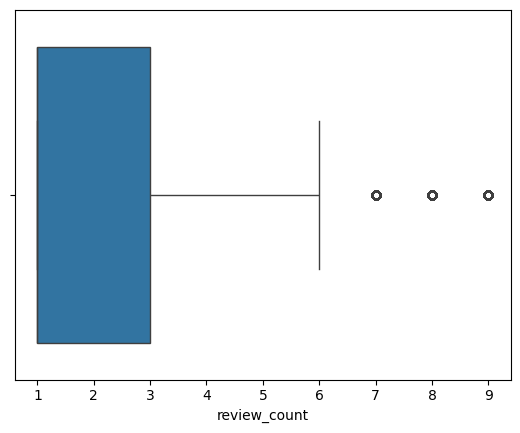

In [42]:
sns.boxplot(x='review_count', data=sampled_users_df)

In [43]:
sampled_interactions_df = df_interactions_final_merged[df_interactions_final_merged['user_id'].isin(sampled_users_df['user_id'])]
print(sampled_interactions_df.shape)
sampled_interactions_df.head(3)

(841671, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
161,afc070543f19028dc7e7f084a0079f72,24300,abdad7525604ae79bd6f4b7f06ee5ca8,0,NaN,2017-10-23 17:49:18+00:00,NaN,2542,NaN,0.406046
162,afc070543f19028dc7e7f084a0079f72,16054808,296f2c13ae025ebeace5723322f361a1,0,NaN,2017-10-20 00:14:15+00:00,NaN,2546,NaN,0.406046
163,afc070543f19028dc7e7f084a0079f72,25311520,36567650cbe4e3a224e19a84f853fe21,5,Wonderful middle grades story.,2017-09-07 02:34:44+00:00,1.0,2589,wonderful middle grade story,0.571900


In [44]:
sampled_interactions_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text_incomplete',
       'date_added', 'n_votes', 'review_age', 'processed_review', 'sentiment'],
      dtype='object')

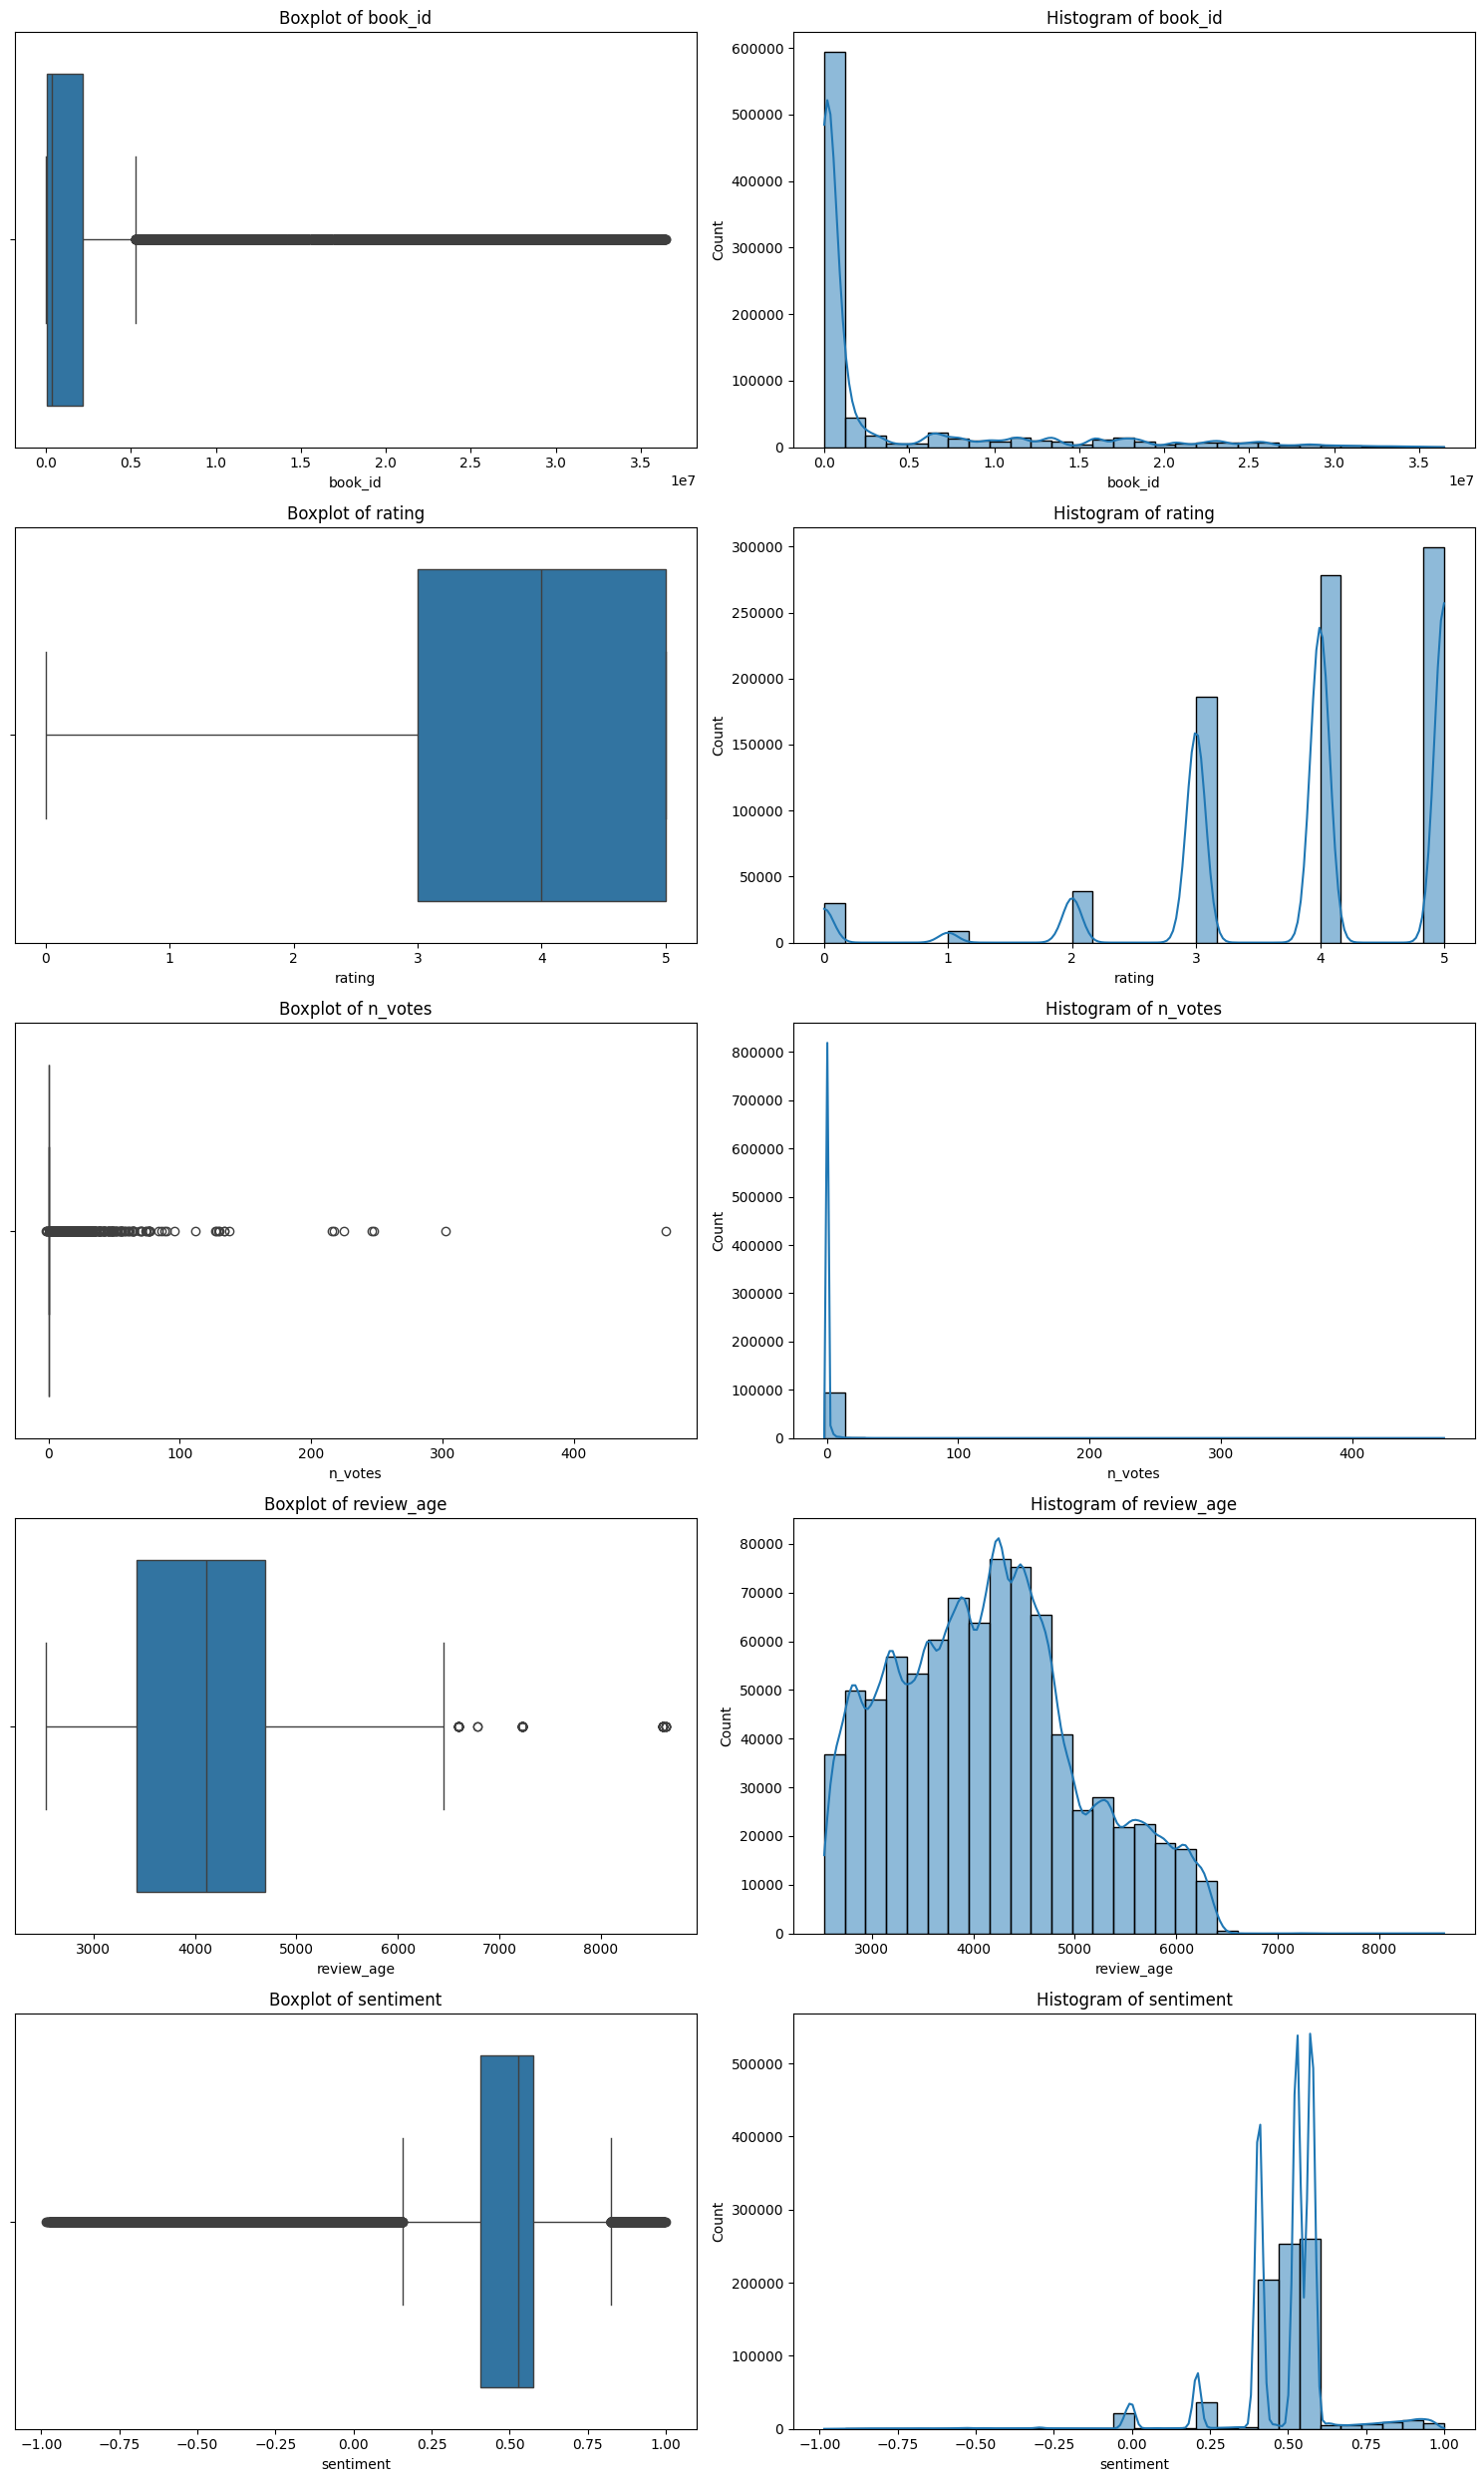

In [45]:
# Define function to plot distribution of numerical variables
def plot_distributions(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(['number']).columns

    # Create subplots: one row for each feature, with both a boxplot and a histogram
    n_cols = len(numerical_cols)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5 * n_cols))
    
    for i, col in enumerate(numerical_cols):
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {col}')
        
        # Histogram
        sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

plot_distributions(sampled_interactions_df)

In [46]:
sampled_interactions_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text_incomplete',
       'date_added', 'n_votes', 'review_age', 'processed_review', 'sentiment'],
      dtype='object')

## Removing Redundant Columns

In [49]:
sampled_interactions_df.drop(columns=['review_id', 'review_text_incomplete', 'date_added', 'processed_review'], inplace=True)

C:\Users\rayna\AppData\Local\Temp\ipykernel_10364\1205395776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_interactions_df.drop(columns=['review_id', 'review_text_incomplete', 'date_added', 'processed_review'], inplace=True)


In [50]:
sampled_interactions_df.shape

(841671, 6)

# Export Sampled Interactions Data to CSV

In [51]:
sampled_interactions_df.to_csv('df_interactions_sampled.csv', index=False)